# Week 9 HW - Monte Carlo

## 1) Lets Make a Deal
Monte Carlo methods are often useful to ensure that our thinking is reasonable. A good
example of this kind of use is to investigate a simple problem that generated much attention
several years ago and for which many mathematicians obtained an incorrect solution.

The problem was the analysis of the optimal strategy in a television game show popular at
the time. The show was Lets Make a Deal with host Monty Hall. At some point in the show,
a contestant was given a choice of selecting one of three possible items, each concealed behind
one of three closed doors. The items varied considerably in value.

After the contestant made a choice but before the chosen door was opened, the
host, who knew where the most valuable item was, would open one of the doors
not selected and reveal a worthless item.

**The host would then offer to let the contestant select a different door from what was originally
selected. The question, of course, is should the contestant switch?**

Much interest in this problem was generated when it was analyzed by a popular magazine
writer, Marilyn vos Savant, who concluded that the optimal strategy is to switch. This
strategy is counterintuitive to many mathematicians, who would say that there is nothing to
be gained by switching; that is, that the probability of improving the selection is 0.5. Study
this problem by Monte Carlo methods. Be careful to understand all of the assumptions

**Write a code that implement this test for 1000 “games” and determine that following:
(a) Determine the probability of improving the selection by switching?**


In [2]:
import numpy as np
W = 0
L = 0

for y in range(1,10002):
    x = "Switch"
    
    D1 = []       #Door 1
    D2 = []       #Door 2
    D3 = []       #Door 3
    s_door = []   #Shown Door
# Step 1: Put the prize behind a door (randomly)
    p_door = np.random.randint(1,[4])
    if p_door == 1:
        D1.append("Prize")
    elif p_door == 2:
        D2.append("Prize")
    else:
        D3.append("Prize")
# Step 2: Select a door (randomly)
    c_door = np.random.randint(1,[4])
    if c_door == 1:
        D1.append("Selected")
    elif c_door == 2:
        D2.append("Selected")
    else:
        D3.append("Selected")

#Step 3: Opening a door that hasn't been selected or has the prize
    if len(D1) == 0:
        s_door.append("D1")
    
    if len(D2) == 0:
        s_door.append("D2")
    
    if len(D3) == 0:
        s_door.append("D3")


    if len(s_door) != 1:
        rem_door = int(np.random.randint(0,[2]))
        s_door.remove(s_door[rem_door])
    else:
        s_door.remove(s_door[0])

    ans = x

    if p_door == c_door:
        if ((ans == "Switch") or (ans == "switch")):
            L = L+1
            #print("SUCK IT YOU LOST >:)")
        elif ((ans == "Stay") or (ans == "stay")):
            W = W+1
            #print("You win!")
        else:
            print("Put something valid in you illiterate baffoon")
    else:
        if ((ans == "Stay") or (ans == "stay")):
            L = L+1
            #print("SUCK IT YOU LOST >:)")
        elif ((ans == "Switch") or (ans == "switch")):
            W = W+1
            #print("You win!")
        else:
            print("Put something valid in you illiterate baffoon")

print(W,L)

6658 3343


In [ ]:
# Answers for the above (N=10,000 as my laptop ran that in a few seconds):

# Switch in general got it correct 2/3 of the time out of 10,000 games
# Stay in general got it correct 1/3 of the time out of 10,000 games
# So you probably want to switch unless you're a pyschic and have a gut feeling

## 2) Random Numbers and Radio Activity

The isotope $^{213}$Bi decays to stable $^{209}$Bi via one of two different routes, with probabilities and
half-lives thus

<img src="Decay9.jpg" alt="Decay process for Bi213 to Bi209" title="Bismuth Decay" />

(Technically, $^{209}$Bi isnt really stable, but it has a half-life of more than $10^{19}$ years, a billion
times the age of the universe, so it might as well be.)

Starting with a sample consisting of 10,000 atoms of $^{213}$Bi, simulate the decay of the atoms
by dividing time into slices of length $\delta t = 1$s each and on each step doing
the following:

1. For each atom of $^{209}$Pb in turn, decide at random, with the appropriate probability, whether it decays or not. (The probability can be calculated from $p(t) = 1 − 2t/\tau $, where $\tau$ is the half life.) Count the total number that decay, subtract it from the number of $^{209}$Pb atoms, and add it to the number of $^{209}$Bi atoms.

2. Now do the same for $^{209}$Tl, except that decaying atoms are subtracted from the total for $^{209}$Tl and added to the total for $^{209}$Pb.

3. For $^{213}$Bi the situation is more complicated: when a $^{213}$Bi atom decays you have to decide at random with the appropriate probability the route by which it decays. Count the numbers that decay by each route and add and subtract accordingly.

Note that you have to work up the chain from the bottom like this, not down from the top,
to avoid inadvertently making the same atom decay twice on a single step.

Keep track of the number of atoms of each of the four isotopes at all times for 20,000 seconds
and make a single graph showing the four numbers as a function of time on the same axes.



In [ ]:
# No Fractional Atoms

# Constants:
N213Bi = 10000 # Number of 213 Bi atoms
N209Tl = 0     # Number of 209 Tl atoms
N209Pb = 0     # Number of 209 Pb atoms
N209Bi = 0     # Number of 209 Bi atoms
#HL213Bi = 2760 # Half Life of 213 Bi (in seconds)
#HL209Tl = 132  # Half Life of 209 Tl (in seconds)
#HL209Pb = 198  # Half Life of 209 Pb (in seconds)
h = 1.0               # Size of time-step in seconds
p213Bi = 1 - (2**(-h/2760)) # Probability of decay in one step
pTl = 1 - (2**(-h/132))
pPb = 1 - (2**(-h/198))
tmax = 10000           # Total time

# Lists of plot points
tpoints = arange(0.0,tmax,h) # make time array
Tlpoints = [] # empty array to store # of Tl atoms at each time step
Pbpoints = [] # empty array to store # of Pb atoms at each time step
Bi213points = [] # empty array to store # of 213Bi atoms at each time step
Bi209points = [] # empty array to store # of 209Bi atoms at each time step

# Main loop
for t in tpoints:    # for time 0-1000 sec
    Tlpoints.append(NTl) # append starting # of Tl atoms
    Pbpoints.append(NPb) # append starting # of Pb atoms
    Bi213points.append(N213Bi) # append starting # of 213 Bi atoms
    Bi209points.append(N209Bi) # append starting # of 209 Bi atoms
    
    # Calculate the number of atoms that decay
    decay = 0
    for i in range(N209Pb): # determine number of atoms that decay
        if np.random.random() < pPb:
            decay += 1
    N209Pb -= decay # subtract number of decayed Parent atoms 
    N209Bi += decay # add number of decayed Daughter atoms 
    
    decay = 0
    for j in range(N209Tl): # determine number of atoms that decay
        if np.random.random() < pTl:
            decay += 1
    N209Tl -= decay # subtract number of decayed Parent atoms 
    N209Pb += decay # add number of decayed Daughter atoms 
    
    decay = 0
    decayPb = 0
    decayTl = 0
    for k in range(N213Bi): # determine number of atoms that decay
        if np.random.random() < p213Bi:  #CHECK THIS OUT LATER
            decay += 1
        for m in range(decay):
            if np.random.random() <= .9791:
                decayPb += 1
            else:
                decayTl += 1
    N213Bi -= decay # subtract number of decayed Parent atoms 
    N209Pb += decayPb # add number of atoms that decayed to Pb
    N209Tl += decayTl # add number of atoms that decayed to Tl

# Make the graph
plot(tpoints,Tlpoints, c='c') # plot Tl vs. time
plot(tpoints,Pbpoints, c='b') # plot Pb vs. time
plot(tpoints,Bi213points, c='k') # plot Bi-213 vs. time
plot(tpoints,Bi209points, c='r') # plot Bi-209 vs. time
xlabel("Time")
ylabel("Number of atoms")
show()


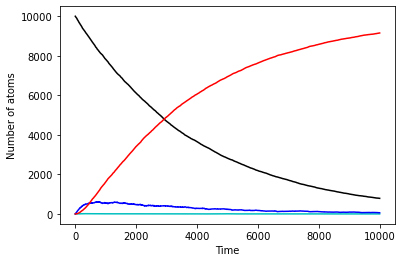

In [16]:
# No Fractional Atoms

# Constants:
N213Bi = 10000 # Number of 213 Bi atoms
N209Tl = 0     # Number of 209 Tl atoms
N209Pb = 0     # Number of 209 Pb atoms
N209Bi = 0     # Number of 209 Bi atoms
#HL213Bi = 2760 # Half Life of 213 Bi (in seconds)
#HL209Tl = 132  # Half Life of 209 Tl (in seconds)
#HL209Pb = 198  # Half Life of 209 Pb (in seconds)
h = 1.0               # Size of time-step in seconds
p213Bi = 1 - (2**(-h/2760)) # Probability of decay in one step
pTl = 1 - (2**(-h/132))
pPb = 1 - (2**(-h/198))
tmax =  10000          # Total time

# Lists of plot points
tpoints = arange(0.0,tmax,h) # make time array
Tlpoints = [] # empty array to store # of Tl atoms at each time step
Pbpoints = [] # empty array to store # of Pb atoms at each time step
Bi213points = [] # empty array to store # of 213Bi atoms at each time step
Bi209points = [] # empty array to store # of 209Bi atoms at each time step

# Main loop
for t in tpoints:    # for time 0-1000 sec
    Tlpoints.append(N209Tl) # append starting # of Tl atoms
    Pbpoints.append(N209Pb) # append starting # of Pb atoms
    Bi213points.append(N213Bi) # append starting # of 213 Bi atoms
    Bi209points.append(N209Bi) # append starting # of 209 Bi atoms
    
    # Calculate the number of atoms that decay
    decay = 0
    for i in range(N209Pb): # determine number of atoms that decay
        if np.random.random() < pPb:
            decay += 1
    N209Pb -= decay # subtract number of decayed Parent atoms 
    N209Bi += decay # add number of decayed Daughter atoms 
    #print(N209Bi, N209Pb, (N209Bi+N209Pb))
    
    decay = 0
    for j in range(N209Tl): # determine number of atoms that decay
        if np.random.random() < pTl:
            decay += 1
    N209Tl -= decay # subtract number of decayed Parent atoms 
    N209Pb += decay # add number of decayed Daughter atoms 
    #print(N209Tl, N209Pb, (N209Tl+N209Pb))
    
    decay = 0
    decayPb = 0
    decayTl = 0
    for k in range(N213Bi): # determine number of atoms that decay
        if np.random.random() < p213Bi:  #CHECK THIS OUT LATER
            decay += 1
        #for m in range(decay):
            if np.random.random() <= .9791:
                decayPb += 1
            else:
                decayTl += 1
    N213Bi -= decay # subtract number of decayed Parent atoms 
    N209Pb += decayPb # add number of atoms that decayed to Pb
    N209Tl += decayTl # add number of atoms that decayed to Tl
    #print(N213Bi, N209Pb, N209Tl, N209Bi,(N213Bi+N209Pb+N209Tl+N209Bi))
    
plot(tpoints,Tlpoints, c='c') # plot Tl vs. time
plot(tpoints,Pbpoints, c='b') # plot Pb vs. time
plot(tpoints,Bi213points, c='k') # plot Bi-213 vs. time
plot(tpoints,Bi209points, c='r') # plot Bi-209 vs. time
xlabel("Time")
ylabel("Number of atoms")
show()



### Decay of a Single Isotope Exaple - (Use this code as a basis of Problem 2)

The radioisotope $^{209}Tl$ (thalium 208) decays in stable $^{208}Pb$ (lead 208) with a half-life of 3.053 minutes.  Suppose we start with a sample of 100 thalium atoms.  Let us simulate the decay of these atoms over time. mimicking the randomness of the decay using random numbers 


We want to simulate the decay of 100 atoms.  On average we know that the number $N$ of atoms in our sample will fall off exponentially over time according to the standard equation of radioactive decay:

$$ N(t)= N(0) 2^{-t/\tau}$$

where $\tau$ is the half life.   Then the fraction of atoms remaining after time t is $N(t)/N(0) = 2^{-t/\tau}$ and the fractionthat have decayed, which is equal to the probability $p(t)$ that any particular single atom has decayed, is one minus this number or

$$p(t) = 1 - 2^{-t/\tau}$$

Thus this number represents the probability that a single atom decays in a time interval of length $l$.

We will simulate the decay of our sample of 100 atoms by dividing the atoms into two sets, one of thallium and one of lead.  

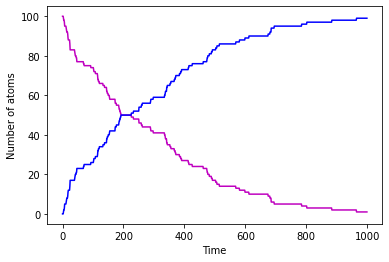

In [4]:
import numpy as np
from numpy import arange
from pylab import plot,xlabel,ylabel,show

# Constants

NTl = 100             # Initial Number of thallium atoms
NPb = 0               # Number of lead atoms
tau = 3.053*60        # Half life of thallium in seconds
h = 1.0               # Size of time-step in seconds
p = 1 - 2**(-h/tau)   # Probability of decay in one step
tmax = 1000           # Total time

# Lists of plot points
tpoints = arange(0.0,tmax,h) # make time array
Tlpoints = [] # empty array to strore # of Tl atoms at each time step
Pbpoints = [] # empty array to strore # of Pb atoms at each time step

# Main loop
for t in tpoints:    # for time 0-1000 sec
    Tlpoints.append(NTl) # append starting # of Tl atoms
    Pbpoints.append(NPb) # append starting # of Pb atoms

    # Calculate the number of atoms that decay
    decay = 0
    for i in range(NTl): # determine number of atoms that decay
        if np.random.random() < p:
            decay += 1
    NTl -= decay # subtract number of decayed Parent atoms 
    NPb += decay # add number of decayed Daughter atoms 

# Make the graph
plot(tpoints,Tlpoints, c='m') # plot Tl vs. time
plot(tpoints,Pbpoints, c='b') # plot Pb vs. time
xlabel("Time")
ylabel("Number of atoms")
show()


If you up the number of atoms to 1,000 or 10,000 you'll see the mean exponential decay will become clearer, by at 100, you can see the stochatic nature of the individual decay times.

NOTE: You will have additional decays, half-lives, and probabilities for the HW problem, be careful of the order of of what happens in each time step. 